<div style="background-color: #bfd630; font-family: Calibri, sans-serif; padding: 20px;">



   <div style="text-align: center;">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 120px; margin-top: 20px; margin-bottom: 60px;">
   </div>

   <div style="text-align: center; font-size: 24px; font-weight: bold; font-family: Calibri; color: #000000; margin-bottom: 10px;">
      Machine Learning Project | To Grant or Not to Grant
   </div>
   
   <div style="text-align: center; font-family: Calibri; font-size: 22px; color: #000000; font-weight: bold; margin-bottom: 20px;">
      3. Feature Selection and Modeling
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 5px;">
      Nova Information Management School
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 20px;">
      Universidade Nova de Lisboa
   </div>
        <div style="text-align: center; font-size: 16px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 10px;">
      Master in Data Science and Advanced Analytics
   </div>
 
   <div style="text-align: center;">
      <img src="https://cdn.prod.website-files.com/617accb8b04ef2b3feffa61b/6581e90d485a9976c3576a46_how-does-workers-comp-work.jpg" style="width: 350px; margin-top: 20px; margin-bottom: 60px;">
   </div>




   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; font-weight: bold; margin-bottom: 20px;">
      Project Group: 32
   </div>

   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 40px">
      Filipa Pereira -  20240509 <br>
      Klimentina Gilevska -  20240747 <br>
      Maria Assunção -  20211605 <br>
      Rita Matos -  20211642 <br>
      Rita Wang -  20240551 <br>
      Sven Goerdes -  20240503
   </div>

   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 10px">
      Fall/Spring Semester 2024-2025
   </div>

  <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 20px;">
      11th November 2024
   </div>

   
</div>

__Important Information__
> * We decided to split our work into three seperate Notebooks:
>    * __1_Exploratory_Analysis.ipynb__
>    * __2_Data_Preprocessing_Feature_Engineering.ipynb__
>    * __3_Feature_Selection_and_Modeling.ipynb__
> * Use __[this Link](https://liveeduisegiunl-my.sharepoint.com/:f:/g/personal/20240503_novaims_unl_pt/EnKkRQ-J50xFjACxTL76qTkB5EShz59_RLYlbq-Y-O6XkA?e=Ag9TLX)__ to obtain the __required data for this Notebook__ without running 2.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_theme(style='darkgrid', palette='Set2')


In [2]:
# import data
X_train = pd.read_csv('../project_data/X_train_encoded_pca.csv', index_col=0)
X_val = pd.read_csv('../project_data/X_val_encoded_pca.csv', index_col=0)

y_train = pd.read_csv('../project_data/y_train.csv', index_col=0)  
y_val = pd.read_csv('../project_data/y_val.csv', index_col=0)



# drop Average Weekly Wage 
X_train.drop(columns=['Average Weekly Wage'], inplace=True)
X_val.drop(columns=['Average Weekly Wage'], inplace=True)

# Drop First Hearing Date 
X_train.drop(columns=['First Hearing Date'], inplace=True)
X_val.drop(columns=['First Hearing Date'], inplace=True)


# Drop Alternative Dispute Resolution
X_train.drop(columns=['Alternative Dispute Resolution'], inplace=True)
X_val.drop(columns=['Alternative Dispute Resolution'], inplace=True)

# drop C-2 Date
X_train.drop(columns=['C-2 Date'], inplace=True)
X_val.drop(columns=['C-2 Date'], inplace=True)

# drop IME-4 Count
X_train.drop(columns=['IME-4 Count'], inplace=True)
X_val.drop(columns=['IME-4 Count'], inplace=True)

# drop Birth Year 
X_train.drop(columns=['Birth Year'], inplace=True)
X_val.drop(columns=['Birth Year'], inplace=True)


In [3]:
X_train.columns

Index(['Age at Injury', 'Attorney/Representative', 'C-3 Date',
       'COVID-19 Indicator', 'Gender', 'Number of Dependents',
       'CarrierGroup_Self-insured Private Entity',
       'CarrierGroup_Self-insured Public Entity', 'CarrierGroup_Special Funds',
       'CarrierGroup_State Insurance Fund',
       'Industry Code_encoded_5. PPD SCH LOSS',
       'Industry Code_encoded_2. NON-COMP',
       'Industry Code_encoded_3. MED ONLY',
       'Industry Code_encoded_4. TEMPORARY',
       'Industry Code_encoded_1. CANCELLED', 'Industry Code_encoded_8. DEATH',
       'Industry Code_encoded_6. PPD NSL', 'Industry Code_encoded_7. PTD',
       'WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS',
       'WCIO Cause of Injury Code_encoded_2. NON-COMP',
       'WCIO Cause of Injury Code_encoded_3. MED ONLY',
       'WCIO Cause of Injury Code_encoded_4. TEMPORARY',
       'WCIO Cause of Injury Code_encoded_1. CANCELLED',
       'WCIO Cause of Injury Code_encoded_8. DEATH',
       'WCIO Cause of Inj

In [4]:
y_val

,Claim Injury Type
Claim Identifier,
5749872,2. NON-COMP
5454703,2. NON-COMP
6092487,3. MED ONLY
5508849,2. NON-COMP
6018090,2. NON-COMP
...,...
5627750,2. NON-COMP
5688230,2. NON-COMP
5656444,3. MED ONLY


In [5]:
display(X_train.head())
display(X_train.head())

display(y_train.head())
display(y_val.head())

,Age at Injury,Attorney/Representative,C-3 Date,COVID-19 Indicator,Gender,Number of Dependents,CarrierGroup_Self-insured Private Entity,CarrierGroup_Self-insured Public Entity,CarrierGroup_Special Funds,CarrierGroup_State Insurance Fund,...,Accident Date_DayOfWeek,Accident Date_Season_spring,Accident Date_Season_summer,Accident Date_Season_winter,Average Weekly Wage_missing,PCA1,PCA2,PCA3,PCA4,PCA5
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5506797,36.0,1,1,0,1,4.0,0,1,0,0,...,3,0,1,0,0,-0.606522,-0.431889,-0.517039,0.094830,0.115859
5481216,48.0,0,1,1,1,5.0,0,0,0,1,...,4,0,1,0,0,0.634965,-0.199594,0.201923,-0.230019,-0.077971
5520188,40.0,1,1,0,0,6.0,0,0,0,1,...,4,0,0,0,0,-0.030854,0.184373,0.182701,0.031208,0.333827
5748412,54.0,1,1,0,0,1.0,0,1,0,0,...,2,0,0,0,0,-0.304749,-0.326966,0.405074,-0.208775,-0.343110
5653867,40.0,0,0,0,1,0.0,1,0,0,0,...,4,1,0,0,0,0.068074,0.697449,-0.107377,0.155814,-0.005872


,Age at Injury,Attorney/Representative,C-3 Date,COVID-19 Indicator,Gender,Number of Dependents,CarrierGroup_Self-insured Private Entity,CarrierGroup_Self-insured Public Entity,CarrierGroup_Special Funds,CarrierGroup_State Insurance Fund,...,Accident Date_DayOfWeek,Accident Date_Season_spring,Accident Date_Season_summer,Accident Date_Season_winter,Average Weekly Wage_missing,PCA1,PCA2,PCA3,PCA4,PCA5
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5506797,36.0,1,1,0,1,4.0,0,1,0,0,...,3,0,1,0,0,-0.606522,-0.431889,-0.517039,0.094830,0.115859
5481216,48.0,0,1,1,1,5.0,0,0,0,1,...,4,0,1,0,0,0.634965,-0.199594,0.201923,-0.230019,-0.077971
5520188,40.0,1,1,0,0,6.0,0,0,0,1,...,4,0,0,0,0,-0.030854,0.184373,0.182701,0.031208,0.333827
5748412,54.0,1,1,0,0,1.0,0,1,0,0,...,2,0,0,0,0,-0.304749,-0.326966,0.405074,-0.208775,-0.343110
5653867,40.0,0,0,0,1,0.0,1,0,0,0,...,4,1,0,0,0,0.068074,0.697449,-0.107377,0.155814,-0.005872


,Claim Injury Type
Claim Identifier,
5506797,5. PPD SCH LOSS
5481216,2. NON-COMP
5520188,5. PPD SCH LOSS
5748412,3. MED ONLY
5653867,4. TEMPORARY


,Claim Injury Type
Claim Identifier,
5749872,2. NON-COMP
5454703,2. NON-COMP
6092487,3. MED ONLY
5508849,2. NON-COMP
6018090,2. NON-COMP


In [6]:
y_train

,Claim Injury Type
Claim Identifier,
5506797,5. PPD SCH LOSS
5481216,2. NON-COMP
5520188,5. PPD SCH LOSS
5748412,3. MED ONLY
5653867,4. TEMPORARY
...,...
5930802,2. NON-COMP
5757476,2. NON-COMP
5988322,2. NON-COMP


In [7]:
claim_injury_type_mapping = {
    '4. TEMPORARY': 4,
    '2. NON-COMP': 2,
    '5. PPD SCH LOSS': 5,
    '3. MED ONLY': 3,
    '6. PPD NSL': 6,
    '1. CANCELLED': 1,
    '8. DEATH': 8,
    '7. PTD': 7
}

y_train = y_train['Claim Injury Type'].map(claim_injury_type_mapping)
y_val = y_val['Claim Injury Type'].map(claim_injury_type_mapping)




In [8]:
# check where columns contains negative values 
print(X_train.columns[(X_train < 0).any()])

# select all the columns that are not negative

Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'], dtype='object')


In [9]:
display(X_train.describe())  
display(X_val.describe())

display(X_train.shape)
display(X_val.shape)

display(y_train.shape)
display(y_val.shape)

display(X_train.info())
display(X_val.info())


,Age at Injury,Attorney/Representative,C-3 Date,COVID-19 Indicator,Gender,Number of Dependents,CarrierGroup_Self-insured Private Entity,CarrierGroup_Self-insured Public Entity,CarrierGroup_Special Funds,CarrierGroup_State Insurance Fund,...,Accident Date_DayOfWeek,Accident Date_Season_spring,Accident Date_Season_summer,Accident Date_Season_winter,Average Weekly Wage_missing,PCA1,PCA2,PCA3,PCA4,PCA5
count,382705.000000,382705.000000,382705.000000,382705.000000,382705.000000,382705.000000,382705.000000,382705.000000,382705.000000,382705.000000,...,382705.000000,382705.000000,382705.000000,382705.000000,382705.0,3.827050e+05,3.827050e+05,3.827050e+05,3.827050e+05,3.827050e+05
mean,42.497352,0.305622,0.319492,0.047585,0.585412,3.006815,0.085567,0.215686,0.001644,0.196203,...,2.499703,0.254896,0.237616,0.250804,0.0,-1.100658e-16,7.874909e-17,-3.806098e-17,-9.513388e-17,-1.154083e-16
std,13.623747,0.460671,0.466280,0.212887,0.492651,2.002236,0.279724,0.411298,0.040508,0.397125,...,1.815965,0.435803,0.425623,0.433477,0.0,4.697686e-01,4.338740e-01,3.329198e-01,2.873570e-01,2.255485e-01
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,-1.226549e+00,-1.431240e+00,-5.926891e-01,-5.857384e-01,-1.071788e+00
25%,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,-3.445415e-01,-3.237517e-01,-2.925865e-01,-1.584031e-01,-1.483988e-01
50%,42.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.0,-5.558554e-02,4.707001e-02,5.518088e-02,-1.208532e-02,-5.821676e-03
75%,54.000000,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,0.000000,1.000000,0.0,2.894935e-01,3.221697e-01,2.130753e-01,8.835547e-02,1.611883e-01
max,88.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,1.000000,1.000000,0.0,1.511651e+00,1.136067e+00,9.124015e-01,1.620232e+00,9.492309e-01


,Age at Injury,Attorney/Representative,C-3 Date,COVID-19 Indicator,Gender,Number of Dependents,CarrierGroup_Self-insured Private Entity,CarrierGroup_Self-insured Public Entity,CarrierGroup_Special Funds,CarrierGroup_State Insurance Fund,...,Accident Date_DayOfWeek,Accident Date_Season_spring,Accident Date_Season_summer,Accident Date_Season_winter,Average Weekly Wage_missing,PCA1,PCA2,PCA3,PCA4,PCA5
count,167563.000000,167563.000000,167563.000000,167563.000000,167563.000000,167563.000000,167563.000000,167563.000000,167563.000000,167563.000000,...,167563.000000,167563.000000,167563.000000,167563.000000,167563.0,167563.000000,167563.000000,167563.000000,167563.000000,167563.000000
mean,42.527408,0.312539,0.323311,0.048292,0.584234,3.004225,0.092318,0.210160,0.001820,0.195735,...,2.506568,0.254203,0.238113,0.251935,0.0,-0.002562,0.004644,0.004580,0.000155,-0.000980
std,13.683064,0.463530,0.467742,0.214384,0.492855,1.999915,0.289475,0.407423,0.042625,0.396767,...,1.815320,0.435413,0.425930,0.434125,0.0,0.469644,0.432269,0.331467,0.285513,0.225555
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,-1.207886,-1.431240,-0.592689,-0.575970,-1.114942
25%,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,-0.346086,-0.318600,-0.279374,-0.154384,-0.149734
50%,42.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.0,-0.059304,0.050314,0.061822,-0.012504,-0.004845
75%,54.000000,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,0.000000,1.000000,0.0,0.289494,0.323479,0.214693,0.088120,0.160410
max,88.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,1.000000,1.000000,0.0,1.511651,1.133208,0.912401,1.620232,0.957803


(382705, 54)

(167563, 54)

(382705,)

(167563,)

<class 'pandas.core.frame.DataFrame'>
Index: 382705 entries, 5506797 to 5844843
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age at Injury                                       382705 non-null  float64
 1   Attorney/Representative                             382705 non-null  int64  
 2   C-3 Date                                            382705 non-null  int64  
 3   COVID-19 Indicator                                  382705 non-null  int64  
 4   Gender                                              382705 non-null  int64  
 5   Number of Dependents                                382705 non-null  float64
 6   CarrierGroup_Self-insured Private Entity            382705 non-null  int64  
 7   CarrierGroup_Self-insured Public Entity             382705 non-null  int64  
 8   CarrierGroup_Special Funds                          382705 non

None

<class 'pandas.core.frame.DataFrame'>
Index: 167563 entries, 5749872 to 5471597
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age at Injury                                       167563 non-null  float64
 1   Attorney/Representative                             167563 non-null  int64  
 2   C-3 Date                                            167563 non-null  int64  
 3   COVID-19 Indicator                                  167563 non-null  int64  
 4   Gender                                              167563 non-null  int64  
 5   Number of Dependents                                167563 non-null  float64
 6   CarrierGroup_Self-insured Private Entity            167563 non-null  int64  
 7   CarrierGroup_Self-insured Public Entity             167563 non-null  int64  
 8   CarrierGroup_Special Funds                          167563 non

None

## 2. Data Preprocessing
Separate Features and Target

In [143]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [10]:
# Compute correlation matrix
corr_matrix = X_train.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# show the correlation matrix as plot 
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

 
# Find features with correlation greater than 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
X_corr = X_train.drop(high_corr_features, axis=1)

print(f"Dropped features due to high correlation: {high_corr_features}")

Dropped features due to high correlation: ['WCIO Nature of Injury Code_encoded_1. CANCELLED', 'WCIO Part Of Body Code_encoded_1. CANCELLED']


In [11]:
X_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382705 entries, 5506797 to 5844843
Data columns (total 52 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age at Injury                                       382705 non-null  float64
 1   Attorney/Representative                             382705 non-null  int64  
 2   C-3 Date                                            382705 non-null  int64  
 3   COVID-19 Indicator                                  382705 non-null  int64  
 4   Gender                                              382705 non-null  int64  
 5   Number of Dependents                                382705 non-null  float64
 6   CarrierGroup_Self-insured Private Entity            382705 non-null  int64  
 7   CarrierGroup_Self-insured Public Entity             382705 non-null  int64  
 8   CarrierGroup_Special Funds                          382705 non

In [146]:
# # Apply SelectKBest with chi-squared
# chi2_selector = SelectKBest(chi2, k=10)

# # Filter out columns with negative values | In this case the principal components contain negative values
# X_corr_filtered = X_corr[X_corr.columns[~(X_corr < 0).any()]]

# # Fit the chi-squared selector
# chi2_selector.fit(X_corr_filtered, y_train)
# chi2_features = X_corr.columns[chi2_selector.get_support(indices=True)].tolist()
# X_chi2 = X_corr[chi2_features]

# print(f"Selected features from chi-squared test: {chi2_features}")


In [ ]:
# # Use RandomForestClassifier for feature ranking

# X_corr_filtered = X_corr.apply(pd.to_numeric, errors='coerce')


# rfe_estimator = RandomForestClassifier(random_state=42)
# rfe_selector = RFE(estimator=rfe_estimator, n_features_to_select=8, step=1)
# rfe_selector.fit(X_corr_filtered, y_train)
# rfe_features = X_corr_filtered.columns[rfe_selector.get_support(indices=True)].tolist()
# X_selected = X_corr_filtered[rfe_features]

# print(f"Selected features from RFE: {rfe_features}")

KeyboardInterrupt: 

In [ ]:
# rfe_features

# # export my features to a txt file
# with open('../project_data/selected_features.txt', 'w') as f:
#     for feature in rfe_features:
#         f.write(f"{feature}\n")       

In [15]:
# read in rfe_features as list
rfe_features = []
with open('../project_data/selected_features.txt', 'r') as f:
    for line in f:
        rfe_features.append(line.strip())
rfe_features



['Age at Injury',
 'Attorney/Representative',
 'Days_between_Acc_Assembyl',
 'Accident Date_Month',
 'PCA1',
 'PCA2',
 'PCA3',
 'PCA4']

In [24]:
def model_training(model, param_grid, model_name,X_train_input, y_train_input, X_val_input, y_val_input):
    """
    Train, tune, and evaluate the model.
    """
    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               scoring='f1_macro',
                               cv=5,
                               n_jobs=-1)
    grid_search.fit(X_train_input, y_train_input)
    
    # Best estimator
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_model.predict(X_val_input[rfe_features])
    
    # Evaluation metrics
    f1 = f1_score(y_val_input, y_pred, average='macro')
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"F1 Score: {f1:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_val_input, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val_input, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # ROC Curve
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_val_input[rfe_features])
        n_classes = len(np.unique(y_train_input))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_val_input == i, y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Plot ROC curves for each class
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curves - {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print(f"ROC Curve not available for {model_name}.")
    
    return best_model

In [25]:
# run mode with a sample of 10000 rows first 
X_train_sample = X_corr.sample(n=10000, random_state=42).apply(pd.to_numeric, errors='coerce')

# geet index from X_train_sample and selet those rows from y_train
y_train_sample = y_train.loc[X_train_sample.index].apply(pd.to_numeric, errors='coerce')

X_val_sample = X_val.sample(n=10000, random_state=42).apply(pd.to_numeric, errors='coerce')
y_val_sample = y_val.loc[X_val_sample.index].apply(pd.to_numeric, errors='coerce')

X_train_sample = X_train_sample.fillna(0)
X_val_sample = X_val_sample.fillna(0)



In [26]:
print(y_train_sample.dtype)
print(np.unique(y_train_sample))

int64
[1 2 3 4 5 6 8]


In [27]:
X_val_sample[rfe_features].info()

X_train_sample[rfe_features].info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5847440 to 5912392
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age at Injury              10000 non-null  float64
 1   Attorney/Representative    10000 non-null  int64  
 2   Days_between_Acc_Assembyl  10000 non-null  int64  
 3   Accident Date_Month        10000 non-null  int64  
 4   PCA1                       10000 non-null  float64
 5   PCA2                       10000 non-null  float64
 6   PCA3                       10000 non-null  float64
 7   PCA4                       10000 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 703.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 6155396 to 5937965
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age at Injury              10000 non-null  float6

Model: Decision Tree
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
F1 Score: 0.2847

Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.36      0.45      3263
           2       0.69      0.93      0.79     85776
           3       0.34      0.01      0.02     20248
           4       0.55      0.52      0.54     42981
           5       0.56      0.38      0.45     13905
           6       0.00      0.00      0.00      1234
           7       0.00      0.00      0.00        28
           8       0.40      0.02      0.03       128

    accuracy                           0.65    167563
   macro avg       0.39      0.28      0.28    167563
weighted avg       0.60      0.65      0.59    167563



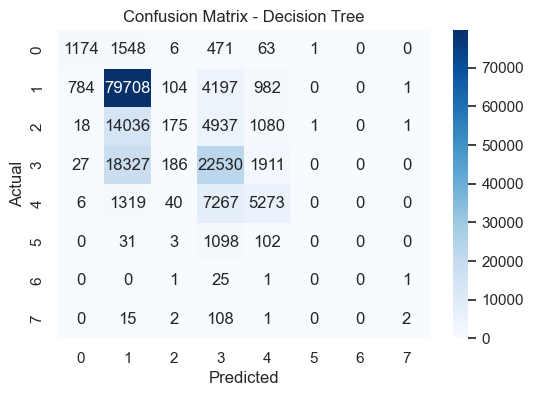

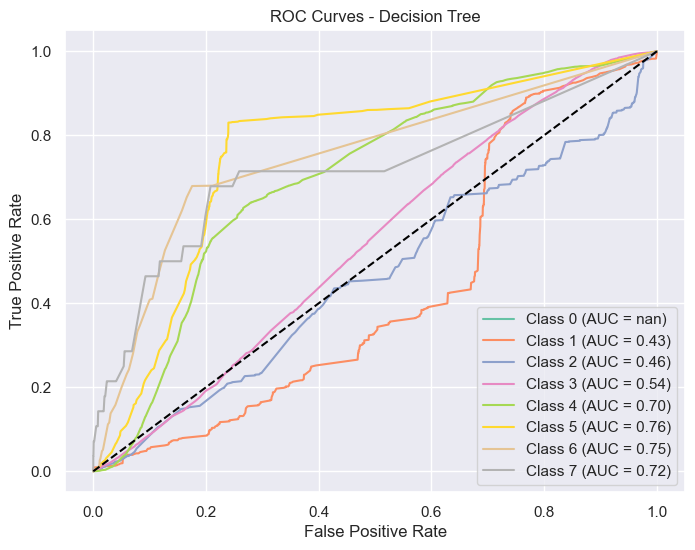

In [28]:
# Define model and parameters
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Train and evaluate
best_dt = model_training(
    dt_model, 
    dt_param_grid, 
    'Decision Tree', 
    X_train[rfe_features],
    y_train,
    X_val[rfe_features],
    y_val)

In [ ]:
# Define model (GaussianNB for numerical features)
nb_model = GaussianNB()
nb_param_grid = {}  # No hyperparameters to tune

# Train and evaluate
# best_nb = model_training(nb_model, nb_param_grid, 'Naive Bayes')

# Train and evaluate
best_dt = model_training(
    dt_model, 
    dt_param_grid, 
    'Naive Bayes', 
    X_train[rfe_features],
    y_train,
    X_val[rfe_features],
    y_val)


In [ ]:
# Define model and parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Train and evaluate
best_xgb = model_training(xgb_model, xgb_param_grid, 'XGBoost')
